<a href="https://colab.research.google.com/github/abuisrar8/OIBSIP/blob/main/TASK_5_SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving Advertising.csv to Advertising.csv


In [3]:
import pandas as pd

data = pd.read_csv('/content/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### **cleaning report**
The dataset contains 200 entries and 5 columns:

1. Unnamed: 0 - Likely an index column.
2. TV - Advertising budget spent on TV (in thousands of dollars).
3. Radio - Advertising budget spent on Radio (in thousands of dollars).
4. Newspaper - Advertising budget spent on Newspaper (in thousands of dollars).
5. Sales - Sales of the product (in thousands of units).

Dropped the Unnamed: 0 column as it was not useful for analysis

### **Exploratory Data Analysis**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


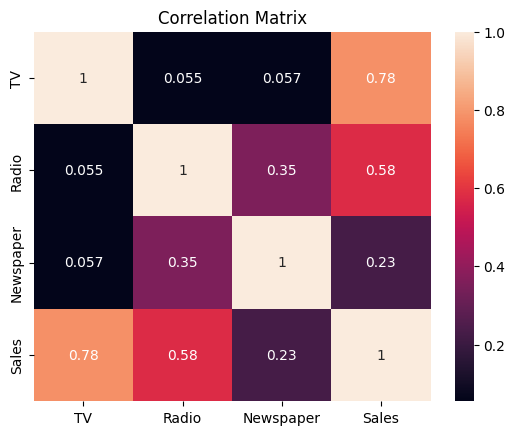

In [8]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

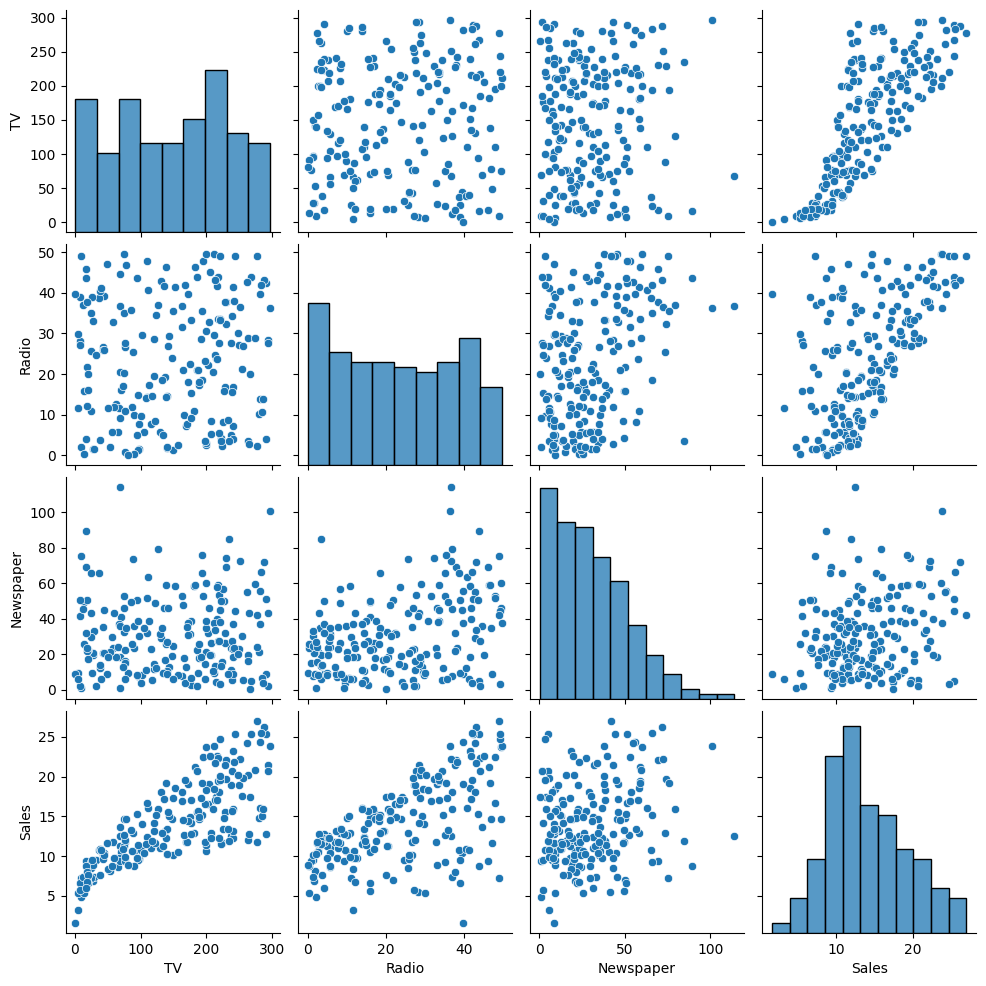

In [9]:
sns.pairplot(data)
plt.show()

### **EDA analysis**
From correlation matrix, it is observed  that:
- TV and Radio advertising have a stronger positive correlation with Sales compared to Newspaper advertising.
- TV and Radio show a correlation with Sales of 0.78 and 0.58 respectively, while Newspaper shows a weaker correlation of 0.23.

### **Model Building**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.1740973539761033


In [17]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.4607567168117603


In [12]:
r2 = r2_score(y_test,y_pred)
print(f"R-Squared: {r2}")

R-Squared: 0.899438024100912


### **predictions vs actual values**

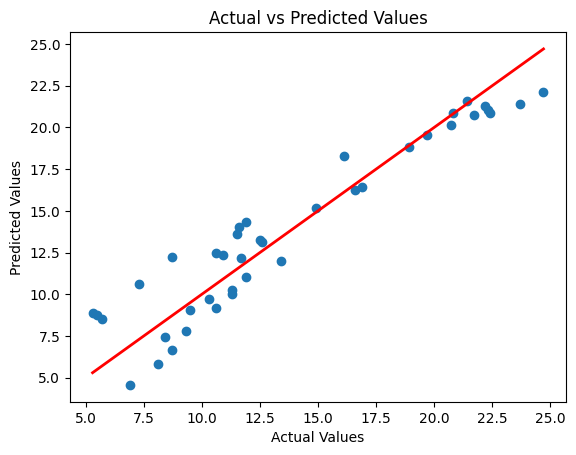

In [14]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red',linewidth = 2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [19]:
# Feature Importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


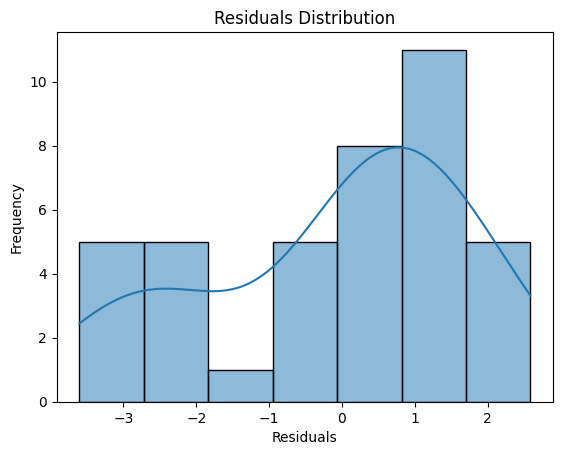

In [20]:
# Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


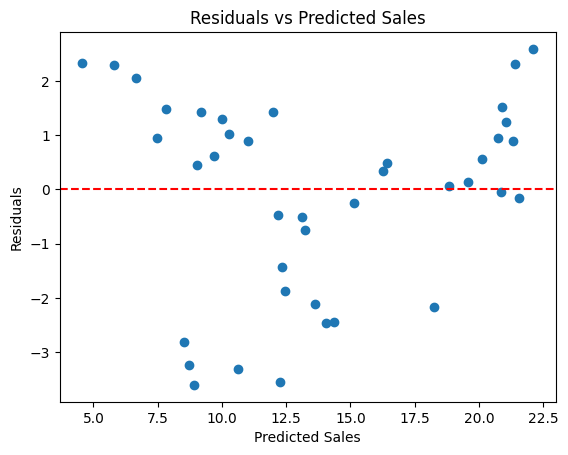

In [21]:
# Check for homoscedasticity (constant variance of residuals)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()